In [1]:
from src.setup import *
%load_ext rpy2.ipython 

In [4]:
%%R
install.packages("gridExtra")

--- Please select a CRAN mirror for use in this session ---


* installing *source* package ‘gridExtra’ ...
** package ‘gridExtra’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (gridExtra)


trying URL 'https://mirror.las.iastate.edu/CRAN/src/contrib/gridExtra_2.3.tar.gz'
Content type 'application/x-gzip' length 1062844 bytes (1.0 MB)
downloaded 1.0 MB


The downloaded source packages are in
	‘/tmp/Rtmpq9iEhN/downloaded_packages’
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


### Missing data

In [8]:
df = pd.read_parquet('data/usa_names.parq')
df

# I assigned favorite colors and flowers to the people for this illustration.

,Age,Gender,Name,Favorite_Color,Favorite_Flower
0,48,F,Lisa,Yellow,Daisy
1,62,F,Karen,Green,Rose
2,26,M,Michael,Purple,None
3,73,F,Patricia,Red,Orchid
...,...,...,...,...,...
6338,11,M,Jacob,Red,Lily
6339,20,M,Jacob,Green,Rose
6340,72,M,Robert,Blue,Lily
6341,64,F,Debra,Purple,Rose


In [10]:
with show_more_rows():
    print(df.describe(include="all"))

                Age Gender     Name Favorite_Color Favorite_Flower
count   6342.000000   6342     6342           5599            5574
unique          NaN      2       69              6               5
top             NaN      F  Michael         Yellow          Orchid
freq            NaN   3190      535            965            1356
mean      42.458846    NaN      NaN            NaN             NaN
std       27.312662    NaN      NaN            NaN             NaN
min        2.000000    NaN      NaN            NaN             NaN
25%       19.000000    NaN      NaN            NaN             NaN
50%       39.000000    NaN      NaN            NaN             NaN
75%       63.000000    NaN      NaN            NaN             NaN
max      101.000000    NaN      NaN            NaN             NaN


Text(0.5, 1.0, 'Distribution of flower preference by age')

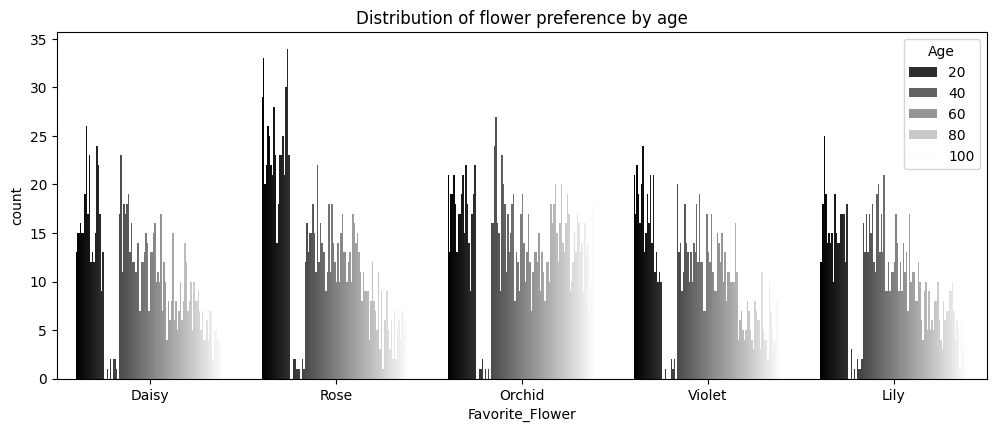

In [13]:
df["Age group"] = df.Age//10 * 10
fig, ax = plt.subplots(figsize = (12, 4.5))
sns.countplot(x = "Favorite_Flower", hue = "Age",
            ax=ax, palette='gray', data=df)
ax.set_title("Distribution of flower preference by age")

Text(0.5, 1.0, 'Distribution of Color Preference by age')

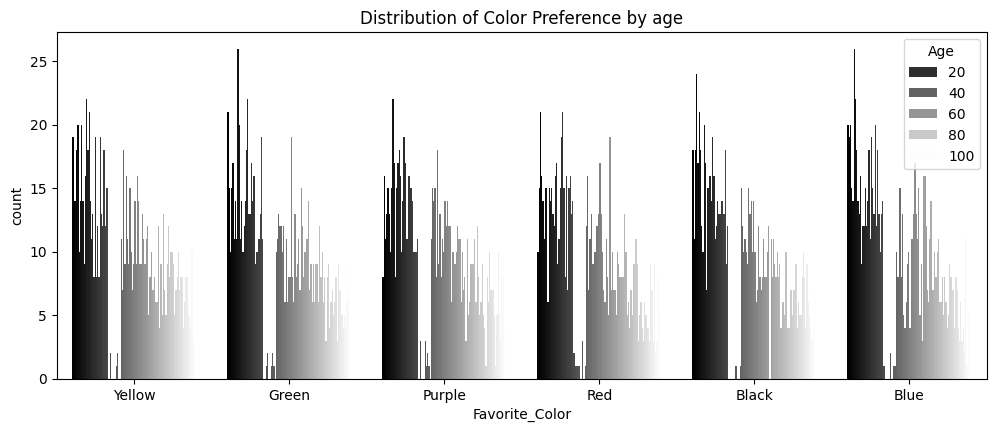

In [18]:
df["Age Group"] = df.Age//10 * 10
fig, ax = plt.subplots(figsize = (12, 4.5))
sns.countplot(x = "Favorite_Color", hue="Age", 
             ax=ax, palette='gray', data=df)
ax.set_title("Distribution of Color Preference by age")

### Biasing trends : Understanding bias 



In [19]:
names = pd.read_parquet('data/usa_names_states.parq')
names

,Age,Birth_Month,Name,Gender,Home
0,17,June,Matthew,M,Hawaii
1,5,September,Emma,F,West Virginia
2,4,January,Liam,M,Alaska
3,96,March,William,M,Arkansas
...,...,...,...,...,...
6338,29,August,Jessica,F,Massachusetts
6339,51,April,Michael,M,Wyoming
6340,29,May,Christopher,M,North Carolina
6341,62,November,James,M,Texas


In [21]:
# The field age group is added 

names = pd.read_parquet('data/usa_names_states.parq')
names['Age Group'] = names.Age//10 * 10
names

,Age,Birth_Month,Name,Gender,Home,Age Group
0,17,June,Matthew,M,Hawaii,10
1,5,September,Emma,F,West Virginia,0
2,4,January,Liam,M,Alaska,0
3,96,March,William,M,Arkansas,90
...,...,...,...,...,...,...
6338,29,August,Jessica,F,Massachusetts,20
6339,51,April,Michael,M,Wyoming,50
6340,29,May,Christopher,M,North Carolina,20
6341,62,November,James,M,Texas,60


Text(0.5, 1.0, 'Distribution of name by age')

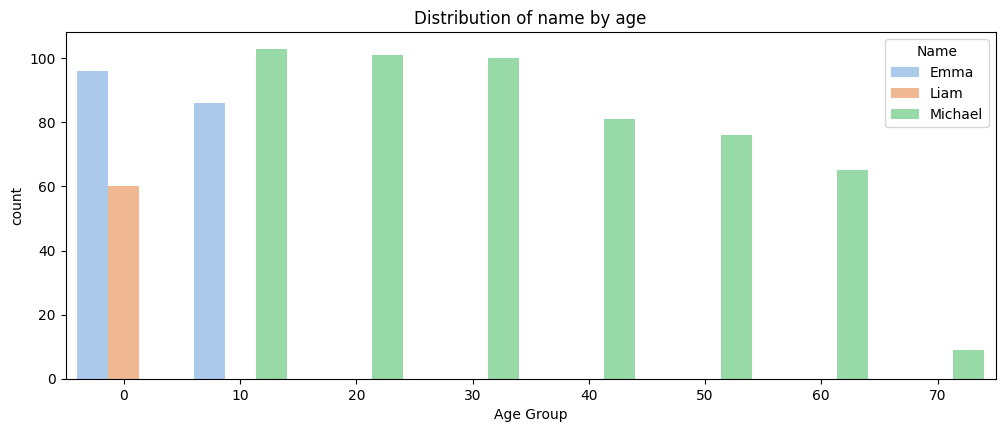

In [28]:
fig, ax = plt.subplots(figsize=(12, 4.5))
somenames = ["Michael", "Emma", "Liam"] 
popular = names[names.Name.isin(somenames)]
sns.countplot(x="Age Group", hue="Name",
             ax=ax, palette='pastel', data=popular)
ax.set_title("Distribution of name by age")

<Axes: xlabel='Age Group', ylabel='count'>

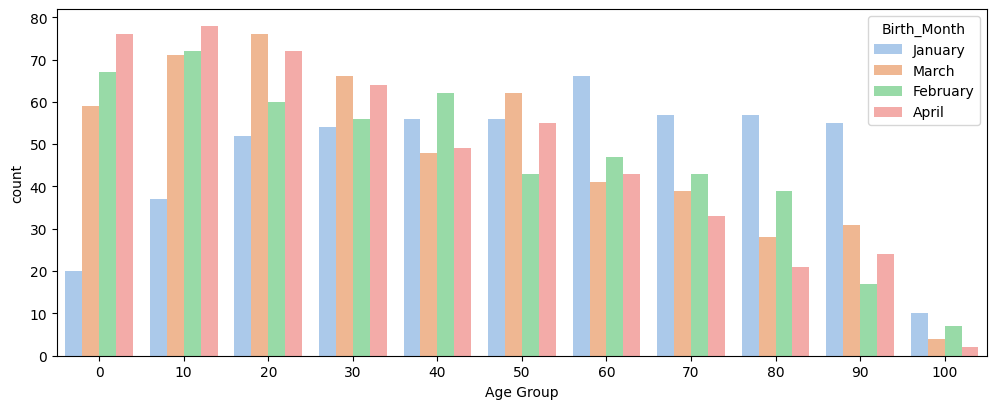

In [33]:
fig, ax = plt.subplots(figsize=(12, 4.5))
months = ["January", "February","March", "April"]
popular = names[names.Birth_Month.isin(months)]
sns.countplot(x="Age Group", hue="Birth_Month",
             ax=ax, palette='pastel', data=popular)

In [37]:
by_month = (names
    .groupby("Age Group")
    .Birth_Month
    .value_counts()
    .unstack()
)

by_month = by_month[month_names]
by_month

Birth_Month,January,February,March,April,May,June,July,August,September,October,November,December
Age Group,,,,,,,,,,,,
0,20,67,59,76,66,77,71,65,67,67,56,63
10,37,72,71,78,70,73,82,81,83,79,70,79
20,52,60,76,72,65,65,71,66,68,75,76,71
30,54,56,66,64,73,58,87,82,66,65,57,58
...,...,...,...,...,...,...,...,...,...,...,...,...
70,57,43,39,33,39,36,45,34,38,30,37,37
80,57,39,28,21,31,37,23,28,27,31,34,37
90,55,17,31,24,21,23,30,29,33,25,28,20
100,10,7,4,2,6,2,4,6,5,5,7,7


In [38]:
states = pd.read_fwf('data/state-population.fwf')
states

,State,Population_2019,Population_2010,House_Seats
0,California,39512223,37254523,53.0
1,Texas,28995881,25145561,36.0
2,Florida,21477737,18801310,27.0
3,New York,19453561,19378102,27.0
...,...,...,...,...
52,Guam,165718,159358,0.5
53,U.S. Virgin Isl,104914,106405,0.5
54,American Samoa,55641,55519,0.5
55,N. Mariana Isl,55194,53883,0.5


<Axes: title={'center': 'Distribution of sample by home state'}, xlabel='Home'>

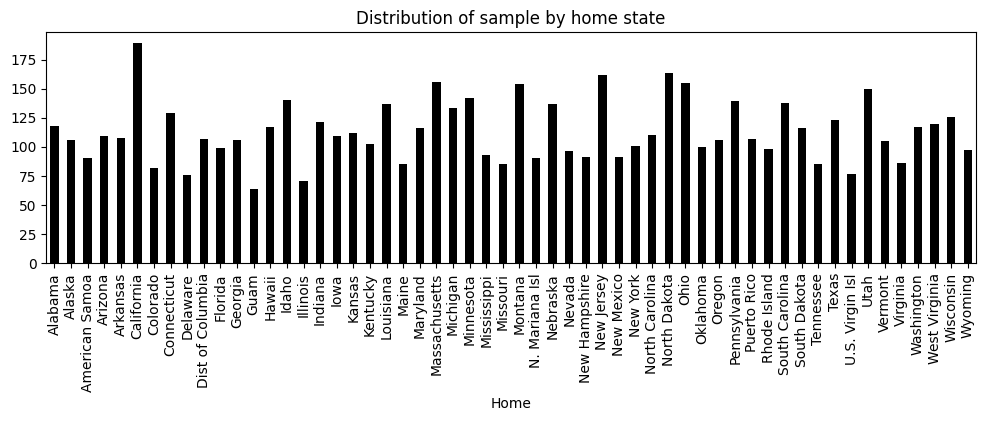

In [40]:
(names
    .Home
    .value_counts()
    .sort_index()
    .plot(kind='bar', figsize=(12, 3),
         title="Distribution of sample by home state")
)

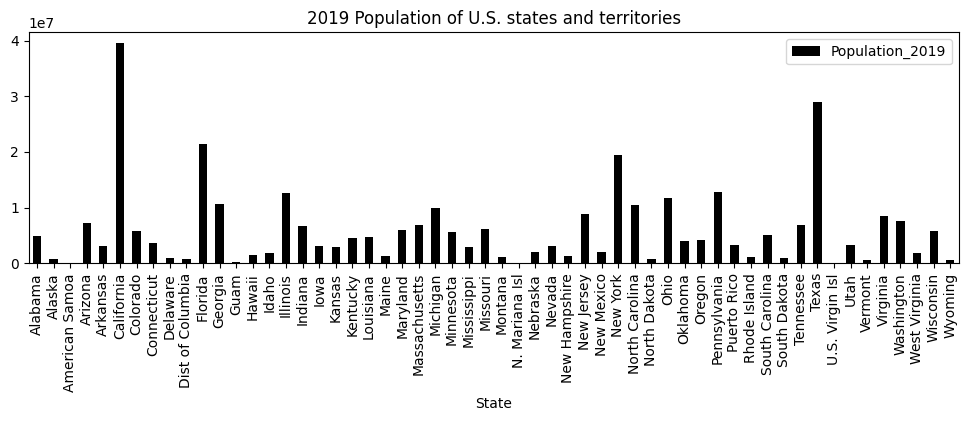

In [41]:
(states
    .sort_values('State')
    [['State', 'Population_2019']]
    .set_index('State')
    .plot(kind='bar', figsize=(12, 3),
    title="2019 Population of U.S. states and territories")
);

In [42]:
cities = pd.read_fwf('data/us-cities.fwf')
cities 

,NAME,POP2019,AREA_KM2
0,New York City,8336817,780.9
1,Los Angeles,3979576,1213.9
2,Chicago,2693976,588.7
3,Houston,2320268,1651.1
...,...,...,...
313,Vacaville,100670,75.1
314,Clinton,100471,72.8
315,Bend,100421,85.7
316,Woodbridge,100145,60.3


Let us first count the leading digits of populations.

In [46]:
pop_digits = cities.POP2019.astype(str).str[0].value_counts()
with show_more_rows():
    print(pop_digits)

POP2019
1    206
2     53
3     20
4     10
6      9
5      8
8      5
9      3
7      3
Name: count, dtype: int64


In [47]:
area_digits = cities.AREA_KM2.astype(str).str[0].value_counts()
with show_more_rows():
    print(area_digits)

AREA_KM2
1    118
2     47
3     31
4     23
8     21
9     21
7     20
6     20
5     16
Name: count, dtype: int64


Neither collection of data exactly matches the Benford’s law ideal distribution, but
both show the general pattern of favoring leading digits in roughly ascending order.

Evaluating the importance of the distribution of categorical values:
## Class imbalances

In [49]:
%%bash 
zcat data/gnosis/*.log.gz |
    cut -d ' ' -f9 | 
    sort |
    uniq -c 


  10280 200
      2 206
    398 301
   1680 304
    181 403
    901 404
      9 500


Considerations 

- Those 4xx and 5xx (and perhaps 301) status codes are generally
undesirable events, and I may want to model the patterns that cause them.

- Let us
remind ourselves what is inside an Apache access.log file

In [50]:
%%bash 

zcat data/gnosis/20200330.log.gz | head -1 | fmt -w50

162.158.238.207 - - [30/Mar/2020:00:00:00 -0400]
"GET /TPiP/024.code HTTP/1.1" 200 75


In [58]:
# Function that reads all the log files of a single day and writes them into pandas 

def apache_log_to_df(fname):
    cols = ['ip_address', 'ident', 'userid', 'timestamp',
        'tz', 'request', 'status', 'size']
    df = pd.read_csv(fname, sep=' ', header=None, names=cols)
    
    # The first pass gets something workable, but refine it
    # Datetime has superfluous '[', but fmt matches that
    fmt = "[%d/%b/%Y:%H:%M:%S"
    
    df['timestamp'] = pd.to_datetime(df.timestamp, format=fmt)
    # Convert timezone to an integer
    # Not general, I know these logs use integral timezone
    # E.g. India Standard Time (GMT+5:30) would break this
    df['tz'] = df.tz.str[:3].astype(int)

    df[['method', 'resource', 'protocol']] = (
            df.request.str.split(' ', expand=True))
    
    # Break the IP address into each quad
    df[['quad1', 'quad2', 'quad3', 'quad4']] = (
            df.ip_address.str.split('.', expand=True))
    
    # Pandas lets us pull components from datetime
    df['hour'] = df.timestamp.dt.hour
    df['minute'] = df.timestamp.dt.minute
    
    # Split resource into the path/directory vs. actual page
    df[['path', 'page']] = (
             df.resource.str.rsplit('/', n=1, expand=True))
    # Only care about some fields for current purposes
    cols = ['hour', 'minute',
    'quad1', 'quad2', 'quad3', 'quad4',
    'method', 'path', 'page', 'status']



## Normalization and Scaling 

In [62]:
unscaled = make_unscaled_features()
unscaled

,Feature_1,Feature_2,Target
0,0.112999,19247.756104,11.407035
1,0.204178,23432.270613,20.000000
2,0.173678,19179.445753,17.336683
3,0.161411,17579.625264,16.633166
...,...,...,...
196,0.137692,20934.654450,13.316583
197,0.184393,18855.241195,18.241206
198,0.177846,19760.314890,17.839196
199,0.145229,20497.722353,14.371859


In [63]:
unscaled.corr()

,Feature_1,Feature_2,Target
Feature_1,1.000000,-0.272963,0.992514
Feature_2,-0.272963,1.000000,-0.269406
Target,0.992514,-0.269406,1.000000


FileNotFoundError: [Errno 2] No such file or directory: 'img/univariate-Feature_1_Feature_2:Target.png'

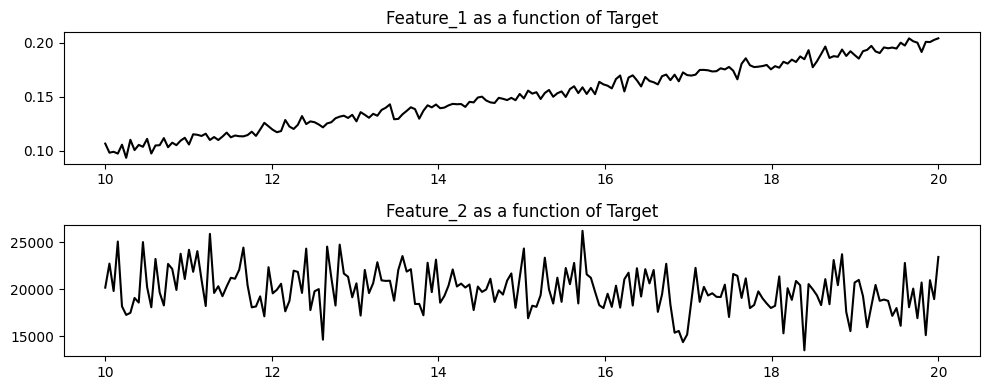

In [64]:
plot_univariate_trends(unscaled)

## Applying a Machine Learning model 

#### Predict the target based on the features 

In [69]:
from sklearn.model_selection import train_test_split

X = unscaled.drop('Target', axis=1)
y = unscaled['Target']

X_train, X_test, y_train, y_test = (train_test_split(X, y, random_state=1))

In [71]:
from sklearn.neighbors import KNeighborsRegressor 

knn = KNeighborsRegressor()
knn.fit(X_train, y_train).score(X_test, y_test)

0.027756186064182953

In [76]:
from sklearn.preprocessing import MinMaxScaler 

X_new = MinMaxScaler().fit_transform(X)

X_Train, X_Test, y_train, y_test = (train_test_split(X_new, y, random_state=1))

knn = KNeighborsRegressor()
knn.fit(X_train, y_train).score(X_test, y_test)

0.027756186064182953

### Scaling techniques 

In [85]:
%%R -i X,X_new 

py_raw_data <- X$Feature_1
py_scaled <- X_new[,1]

normalize <- function(x) {
    floor <- min(x)
    return ((x - floor(x)) / (max(x) - floor(x)) )
}

r_scaled <- normalize(py_scaled)
r_scaled

  [1] 0.17761477 1.00000000 0.72490957 0.61427061 0.89204783 0.97520895
  [7] 0.58473412 0.33355476 0.97045198 0.60337161 0.21854944 0.96338976
 [13] 0.69205525 0.21094607 0.65692022 0.68304306 0.91435710 0.53723378
 [19] 0.80359638 0.78677487 0.69017623 0.15051601 0.54862410 0.10575203
 [25] 0.20165097 0.49223939 0.28226253 0.48307681 0.58971233 0.90085033
 [31] 0.50169629 0.80191451 0.42284756 0.75793037 0.61447960 0.65927890
 [37] 0.51154233 0.83273022 0.19025684 0.88547473 0.03525938 0.69555930
 [43] 0.68817656 0.11897548 0.41887464 0.35225167 0.67151984 0.92258825
 [49] 0.35988636 0.84833466 0.05038208 0.19261269 0.46381327 0.49748045
 [55] 0.44592336 0.77428458 0.90342192 0.35231115 0.83550636 0.46361822
 [61] 0.93645730 0.73955464 0.57483848 0.45884112 0.24134884 0.32734540
 [67] 0.56752392 0.10543785 0.83029213 0.53425342 0.77711876 0.41494291
 [73] 0.73213914 0.00000000 0.93939014 0.40715710 0.80754002 0.42596233
 [79] 0.03590348 0.55535733 0.54238480 0.39378727 0.98704378 0.1

In [87]:
%%R
all.equal(py_scaled, r_scaled)

[1] TRUE


In [89]:
%%R
print("A few 'equalities':")
print(py_scaled[1:5])
print(r_scaled[1:5])

print("Exactly equal?")
print((py_scaled == r_scaled)[1:10])

print("Mean absolute difference:")
print(mean(abs(py_scaled - r_scaled)))

[1] "A few 'equalities':"
[1] 0.1776148 1.0000000 0.7249096 0.6142706 0.8920478
[1] 0.1776148 1.0000000 0.7249096 0.6142706 0.8920478
[1] "Exactly equal?"
 [1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[1] "Mean absolute difference:"
[1] 7.702172e-17


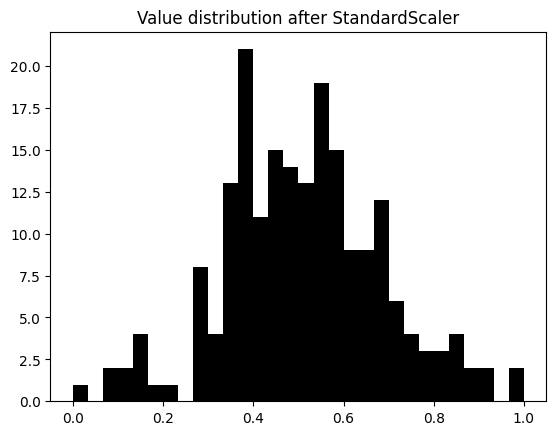

In [91]:
from sklearn.preprocessing import StandardScaler

X_new2 = StandardScaler().fit_transform(X)
plt.hist(X_new[:, 1], bins=30)
plt.title("Value distribution after StandardScaler");

In [99]:
%%R -i X,X_new2

py_raw_data <- X$Feature_2
py_scaled <- X_new2[, 2]

r_scaled = (py_raw_data - mean(py_raw_data)) / sd(py_raw_data)
all.equal(py_scaled, r_scaled)

[1] "Mean relative difference: 0.002503133"


In [105]:
%%R

print(" Mean :")
print(mean(r_scaled))

print("Standard deviation :")
print(sd(r_scaled))

print("almost equal with tolerance = 0.0005")
all.equal(py_scaled, r_scaled, tolerance=0.005)

[1] " Mean :"
[1] 6.591949e-17
[1] "Standard deviation :"
[1] 1
[1] "almost equal with tolerance = 0.0005"
[1] TRUE


In [107]:
X['Feature_3'] = X['Feature_1']
X.loc[0, 'Feature_3'] = 100

Text(0.5, 1.0, 'Value distribution after RobustScaler')

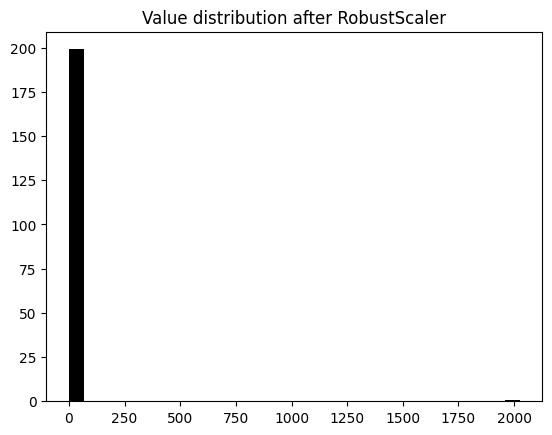

In [110]:
from sklearn.preprocessing import RobustScaler 

X_new3 = RobustScaler().fit_transform(X)

plt.hist(X_new3[:, 2], bins=30)
plt.title("Value distribution after RobustScaler")

Text(0.5, 1.0, 'Value distribution after QuantileTransformation')

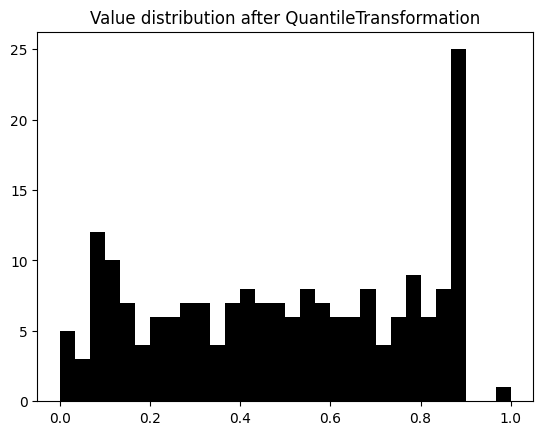

In [112]:
# Scale values to fit quantiles 
from sklearn.preprocessing import QuantileTransformer

deciles = QuantileTransformer(n_quantiles = 10)
X_new4 = deciles.fit_transform(X)

plt.hist(X_new4[:, 2], bins=30)
plt.title("Value distribution after QuantileTransformation")

### Factor and sample Weighting 

There are times when you will wish to give a particular feature more significance
than fair scaling across features allows.

In [119]:
thermo = read_glarp()
start, end = thermo.timestamp.min(), thermo.timestamp.max()

print("Start :", start)
print("End:", end)

print("Days : ", 1 + (end.date() - start.date()).days)

Start : 2003-07-25 16:04:00
End: 2004-07-16 15:28:00
Days :  358


In [121]:
%%R -i thermo 
library(tidyverse)
glarp <- as.tibble(thermo)
glarp

# A tibble: 171,349 × 5
   timestamp           basement   lab livingroom outside
   <dttm>                 <dbl> <dbl>      <dbl>   <dbl>
 1 2003-07-25 16:04:00     24    25.2       29.8    27.5
 2 2003-07-25 16:07:00     24    25.2       29.8    27.3
 3 2003-07-25 16:10:00     24    25.2       29.8    27.3
 4 2003-07-25 16:13:00     24.1  25.2       29.8    27.4
 5 2003-07-25 16:16:00     24.1  25.2       29.8    27.8
 6 2003-07-25 16:19:00     24.1  25.2       29.8    27.5
 7 2003-07-25 16:22:00     24.1  25.2       29.8    27.6
 8 2003-07-25 16:25:00     24.1  25.2       29.8    27.6
 9 2003-07-25 16:28:00     24.1  25.2       29.8    27.7
10 2003-07-25 16:31:00     24.1  25.2       29.8    27.6
# … with 171,339 more rows


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
In addition: Warning message:
`as.tibble()` was deprecated in tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated. 


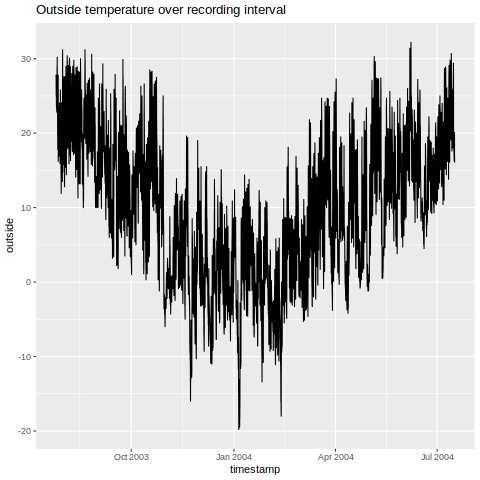

In [126]:
%%R
ggplot(glarp, aes(x=timestamp, y=outside)) +
    geom_line() + 
    ggtitle("Outside temperature over recording interval")

let us fit a second-order
polynomial to the data, which will account for most of the variation that exists in
the measurements.

In [132]:
%%R
# Model the data as a second order polynomial
year.model <- lm(outside ~ poly(timestamp, 2), data = glarp)
# Display the regression and the data
ggplot(glarp, aes(x=timestamp)) + 
    geom_line(aes(y = outside), color = "gray") +
    geom_line(aes(y = predict(year.model)),
    color = "darkred", size = 2) +
    ggtitle("Outside temperature versus polynomial fit")

Error in Ops.difftime(X, Y, ...) : '^' not defined for "difftime" objects


RInterpreterError: Failed to parse and evaluate line '# Model the data as a second order polynomial\nyear.model <- lm(outside ~ poly(timestamp, 2), data = glarp)\n# Display the regression and the data\nggplot(glarp, aes(x=timestamp)) + \n    geom_line(aes(y = outside), color = "gray") +\n    geom_line(aes(y = predict(year.model)),\n    color = "darkred", size = 2) +\n    ggtitle("Outside temperature versus polynomial fit")\n'.
R error message: 'Error in Ops.difftime(X, Y, ...) : \'^\' not defined for "difftime" objects'